<a href="https://colab.research.google.com/github/tanatiem/BADS7105-CRM-Analytics/blob/main/hw01-customer-behaviors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%cd /content/drive/MyDrive/BADS/7105 CRM/work/01

/content/drive/MyDrive/BADS/7105 CRM/work/01


In [2]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/fonts/K2D-Light.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

# Load datset

In [3]:
src = pd.read_excel('01_customer_behaviors.xlsx', dtype={'คุณเกิดวันที่เท่าไหร่' : str})
print(src.shape)
src = src[src.columns[1:]]
src.head()

(63, 64)


,คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง],นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง,คุณเกิดวันที่เท่าไหร่,เพศ
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 

# Data Prep

In [4]:
from datetime import datetime

df = src.copy()

# rename columns
int_cols = [ c.replace('คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด','Interest') for c in df.columns[:30] ]
con_cols = [ c.replace('คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน','Consumption') for c in df.columns[30:60] ]
df.columns = int_cols + con_cols + ['interests', 'dob', 'gender']

# make answers categorical
intr_cattype = pd.CategoricalDtype(categories=['ไม่สนใจอย่างมากที่สุด', 'ไม่สนใจอย่างมาก', 'ไม่สนใจ', 
                                              'เฉยๆ', 'สนใจ', 'สนใจอย่างมาก', 'สนใจอย่างมากที่สุด'], ordered=True)
cons_cattype = pd.CategoricalDtype(categories=['แทบไม่ได้บริโภคเลย', 'หลายเดือนครั้ง', 'เดือนละครั้ง', 
                                               'เดือนละ 2-3 ครั้ง', 'อาทิตย์ละครั้ง', 'แทบทุกวัน'], ordered=True)

for col in df.columns[:30]:
    df[col] = df[col].astype(intr_cattype)

for col in df.columns[30:60]:
    df[col] = df[col].astype(cons_cattype)

# gender
df['gender'] = df['gender'].map({'หญิง':'F', 'ชาย':'M', 'ไม่ต้องการระบุ': np.nan})

# process dates
df['year'] = df['dob'].apply(lambda x: int(x.split()[0].split('-')[0]))
df['year'] = df['year'].apply(lambda x: x if x < 2500 else x - 543)
df['month'] = df['dob'].apply(lambda x: int(x.split()[0].split('-')[1]))
df['day'] = df['dob'].apply(lambda x: int(x.split()[0].split('-')[2]))

df['dob'] = pd.to_datetime(df[['year','month','day']])
df['age'] = df['year'].apply(lambda x: datetime.now().year - x if x < 2010 else np.nan)
df['age_group'] = pd.cut(df['age'], bins=[0,28,32,36,99], right=False, labels=['Below 28','28 - 31', '32 - 35','36+'])

df.drop(['year','month','day'], axis=1, inplace=True)
df.head()

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consumption [อาหารญี่ปุ่น],Consumption [อาหารจึน],Consumption [อาหารไทย],Consumption [อาหารอีสาน],Consumption [อาหารสุขภาพ],Consumption [บุฟเฟต์],Consumption [ชาบูชาบู],Consumption [ปิ้งย่าง],Consumption [เหล้าเบียร์],Consumption [เสื้อผ้าแฟชั่น],Consumption [แต่งหน้า],Consumption [skincare บำรุงผิว],Consumption [การออกกำลังกาย],Consumption [การเล่นเกมส์],Consumption [การท่องเที่ยว],Consumption [การอ่านหนังสือ],Consumption [การอ่านบทความ Online],Consumption [การเรียน e-learning],Consumption [ดู Series],Consumption [ดูหนัง],Consumption [ดู Youtube],Consumption [ดู Netflix],Consumption [Content ด้านบันเทิง],Consumption [Content เกี่่ยวกับเกมส์],Consumption [Content เกี่ยวกับการ review ร้านอาหาร],Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],Consumption [Content เกี่ยวกับการเมือง],interests,dob,gender,age,age_group
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,"กีฬา UFC, Soccer",1988-09-19,M,33.0,32 - 35
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,กีฬา สัตว์เลี้ยง เทคโนโลยี,1993-08-10,F,28.0,28 - 31
2,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมาก,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,เฉยๆ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,สนใจอย่างมากที่สุด,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,หลายเดือนครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย

## Save pickle

In [5]:
df.to_pickle('01_data_prep.pkl')

# EDA



In [6]:
intr_scale = ['ไม่สนใจอย่างมากที่สุด', 'ไม่สนใจอย่างมาก', 'ไม่สนใจ', 'เฉยๆ', 'สนใจ', 'สนใจอย่างมาก', 'สนใจอย่างมากที่สุด']
cons_scale = ['แทบไม่ได้บริโภคเลย', 'หลายเดือนครั้ง', 'เดือนละครั้ง', 'เดือนละ 2-3 ครั้ง', 'อาทิตย์ละครั้ง', 'แทบทุกวัน']

In [7]:
df = pd.read_pickle('01_data_prep.pkl')
df.head()

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consumption [อาหารญี่ปุ่น],Consumption [อาหารจึน],Consumption [อาหารไทย],Consumption [อาหารอีสาน],Consumption [อาหารสุขภาพ],Consumption [บุฟเฟต์],Consumption [ชาบูชาบู],Consumption [ปิ้งย่าง],Consumption [เหล้าเบียร์],Consumption [เสื้อผ้าแฟชั่น],Consumption [แต่งหน้า],Consumption [skincare บำรุงผิว],Consumption [การออกกำลังกาย],Consumption [การเล่นเกมส์],Consumption [การท่องเที่ยว],Consumption [การอ่านหนังสือ],Consumption [การอ่านบทความ Online],Consumption [การเรียน e-learning],Consumption [ดู Series],Consumption [ดูหนัง],Consumption [ดู Youtube],Consumption [ดู Netflix],Consumption [Content ด้านบันเทิง],Consumption [Content เกี่่ยวกับเกมส์],Consumption [Content เกี่ยวกับการ review ร้านอาหาร],Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],Consumption [Content เกี่ยวกับการเมือง],interests,dob,gender,age,age_group
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,"กีฬา UFC, Soccer",1988-09-19,M,33.0,32 - 35
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,กีฬา สัตว์เลี้ยง เทคโนโลยี,1993-08-10,F,28.0,28 - 31
2,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมาก,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,เฉยๆ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,สนใจอย่างมากที่สุด,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,หลายเดือนครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย

## Check & Drop NA

In [8]:
df[df.isna().any(axis=1)]

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consumption [อาหารญี่ปุ่น],Consumption [อาหารจึน],Consumption [อาหารไทย],Consumption [อาหารอีสาน],Consumption [อาหารสุขภาพ],Consumption [บุฟเฟต์],Consumption [ชาบูชาบู],Consumption [ปิ้งย่าง],Consumption [เหล้าเบียร์],Consumption [เสื้อผ้าแฟชั่น],Consumption [แต่งหน้า],Consumption [skincare บำรุงผิว],Consumption [การออกกำลังกาย],Consumption [การเล่นเกมส์],Consumption [การท่องเที่ยว],Consumption [การอ่านหนังสือ],Consumption [การอ่านบทความ Online],Consumption [การเรียน e-learning],Consumption [ดู Series],Consumption [ดูหนัง],Consumption [ดู Youtube],Consumption [ดู Netflix],Consumption [Content ด้านบันเทิง],Consumption [Content เกี่่ยวกับเกมส์],Consumption [Content เกี่ยวกับการ review ร้านอาหาร],Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการโทรทัศน์],Consumption [Content เกี่ยวกับละคร],Consumption [Content เกี่ยวกับการเมือง],interests,dob,gender,age,age_group
13,สนใจอย่างมากที่สุด,ไม่สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,สนใจ,เฉยๆ,ไม่สนใจอย่างมากที่สุด,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,เฉยๆ,เฉยๆ,เฉยๆ,ไม่สนใจ,ไม่สนใจ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบไม่ได้บริโภคเลย,หลายเดือนครั้ง,เดือนละครั้ง,แทบทุกวัน,หลายเดือนครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบไม่ได้บริโภคเลย,หลายเดือนครั้ง,แทบไม่ได้บริโภคเลย,แทบทุกวัน,การออมเงิน,2021-01-09,M,NaN,NaN
62,สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,ไม่สนใจ,ไม่สนใจ,ไม่สนใจอย่างมาก,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,ไม่สนใจ,สนใจ,สนใจ,สนใจ,สนใจ,สนใจ,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,ไม่สนใจ,ไม่สนใจอย่างมาก,ไม่สนใจอย่างมาก,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,หลายเดือนครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,การลงทุน,1991-03-26,NaN,30.0,28 - 31


In [9]:
df.dropna(inplace=True)
df['age'] = df['age'].astype(int)

## Demographics

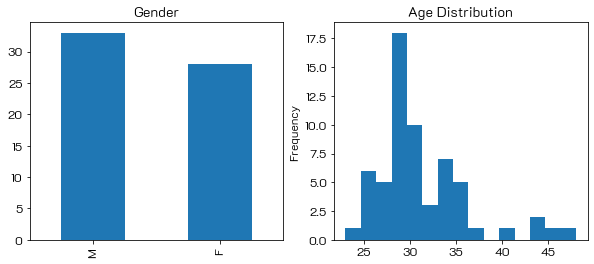

In [10]:
plt.subplots(1,2, figsize=(10,4))
plt.subplot(1,2,1)
df['gender'].value_counts(dropna=False).plot(kind='bar', title='Gender')
plt.subplot(1,2,2)
df['age'].plot.hist(bins=15, title='Age Distribution')
# df['age'].value_counts().sort_index().plot(kind='barh', title='Age')
plt.show()

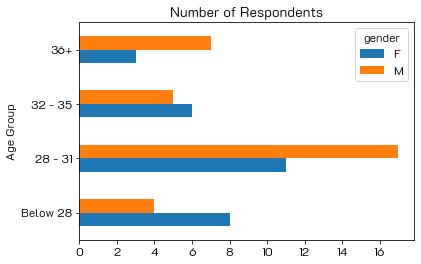

In [11]:
df.groupby(['age_group','gender']).size().unstack().fillna(0).plot(kind='barh', xlabel='Age Group', ylabel='Number of Respondents', title='Number of Respondents');

## Frequency

### Interests

In [12]:
def process_interest(df):
    result = df.iloc[:,:30].melt(var_name='question', value_name='answer').groupby(['question','answer'], as_index=False).size().pivot('question','answer','size').fillna(0)
    result = result[intr_scale].reindex(df.columns[:30])
    result = result.apply(lambda x: x/x.sum(), axis=1)
    return result

int_overall_df = process_interest(df)
int_male_df = process_interest(df[df['gender']=='M'])
int_female_df = process_interest(df[df['gender']=='F'])

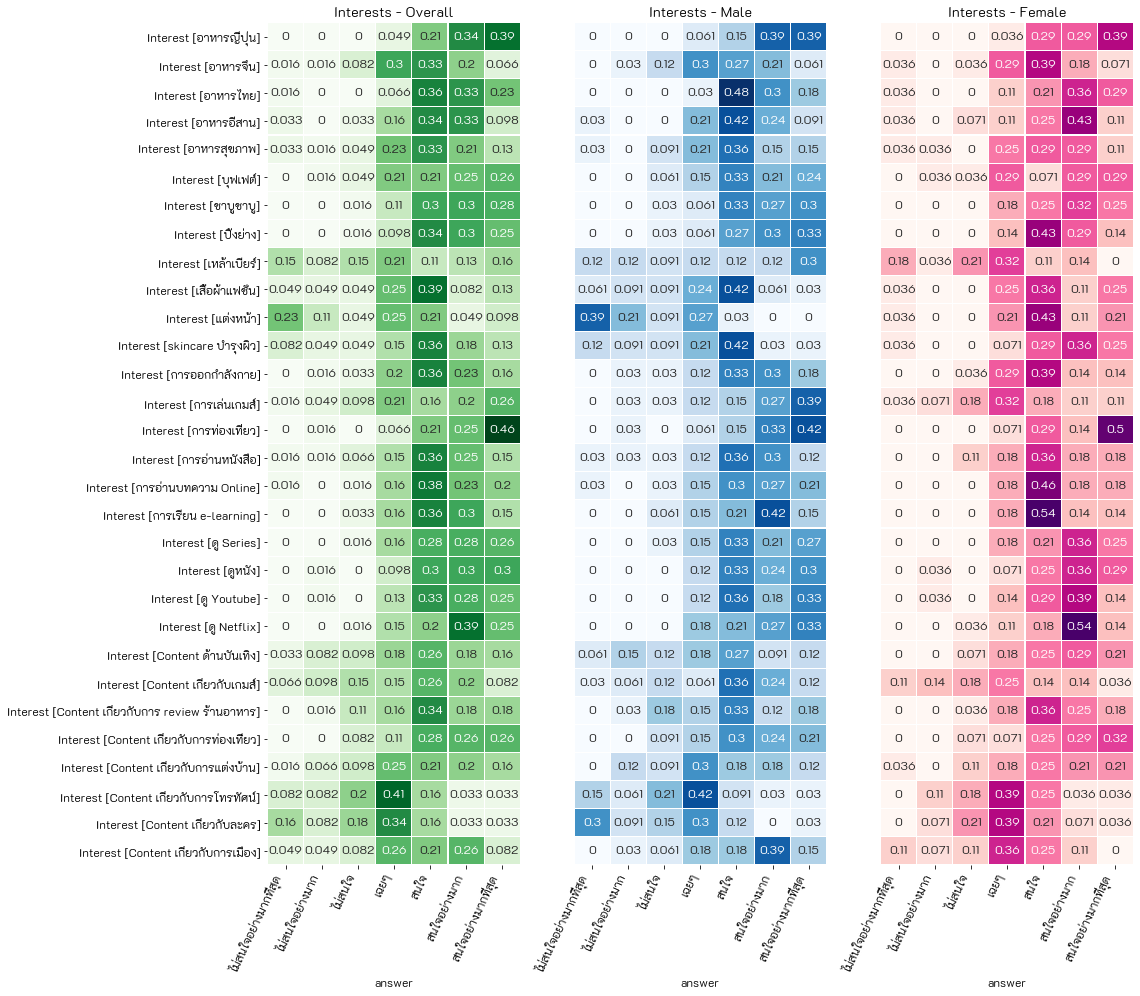

In [24]:
def plot_freq_heatmap(df, cmap, title):
    ax = sns.heatmap(df, cmap=cmap, annot=True, linewidth=.1, vmin=0, cbar=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha='right')
    ax.set_title(title)
    return ax

plt.subplots(1,3, figsize=(16,14), tight_layout=True)

plt.subplot(1,3,1)
plot_freq_heatmap(int_overall_df, 'Greens', 'Interests - Overall')

plt.subplot(1,3,2)
ax = plot_freq_heatmap(int_male_df, 'Blues', 'Interests - Male')
ax.set_yticks([])

plt.subplot(1,3,3)
ax = plot_freq_heatmap(int_female_df, 'RdPu', 'Interests - Female')
ax.set_yticks([])

plt.savefig('interest_freq.png',dpi=100)
plt.show()

จากการดูด้วยตาเบื้องต้น
- ความสนใจในเหล้าเบียร์, การเล่นเกมส์ ของผู้ชายสูงกว่าผู้หญิงอย่างชัดเจน
- ความสนใจเรื่องแต่งหน้า ของผู้หญิงสูงกว่าผู้ชายอย่างชัดเจน
- ส่วนใหญ่ให้ความสนใจในอาหารญี่ปุ่น อาหารไทย อาหารอีสาน ชาบู ปิ้งย่าง การท่องเที่ยว การดูซีรีส์ ดูหนัง Youtube Netflix

**ข้อสังเกต** อาจจะมี bias ค่อนไปทางบวกหลายเรื่อง future work น่าจะลอง handle เรื่อง bias โดยการคำนวณพวก global bias 


### Consumptions

In [28]:
def process_consumption(df):
    result = df.iloc[:,30:60].melt(var_name='question', value_name='answer').groupby(['question','answer'], as_index=False).size().pivot('question','answer','size').fillna(0)
    result = result[cons_scale].reindex(df.columns[30:60])
    result = result.apply(lambda x: x/x.sum(), axis=1)
    return result

con_overall_df = process_consumption(df)
con_male_df = process_consumption(df[df['gender']=='M'])
con_female_df = process_consumption(df[df['gender']=='F'])

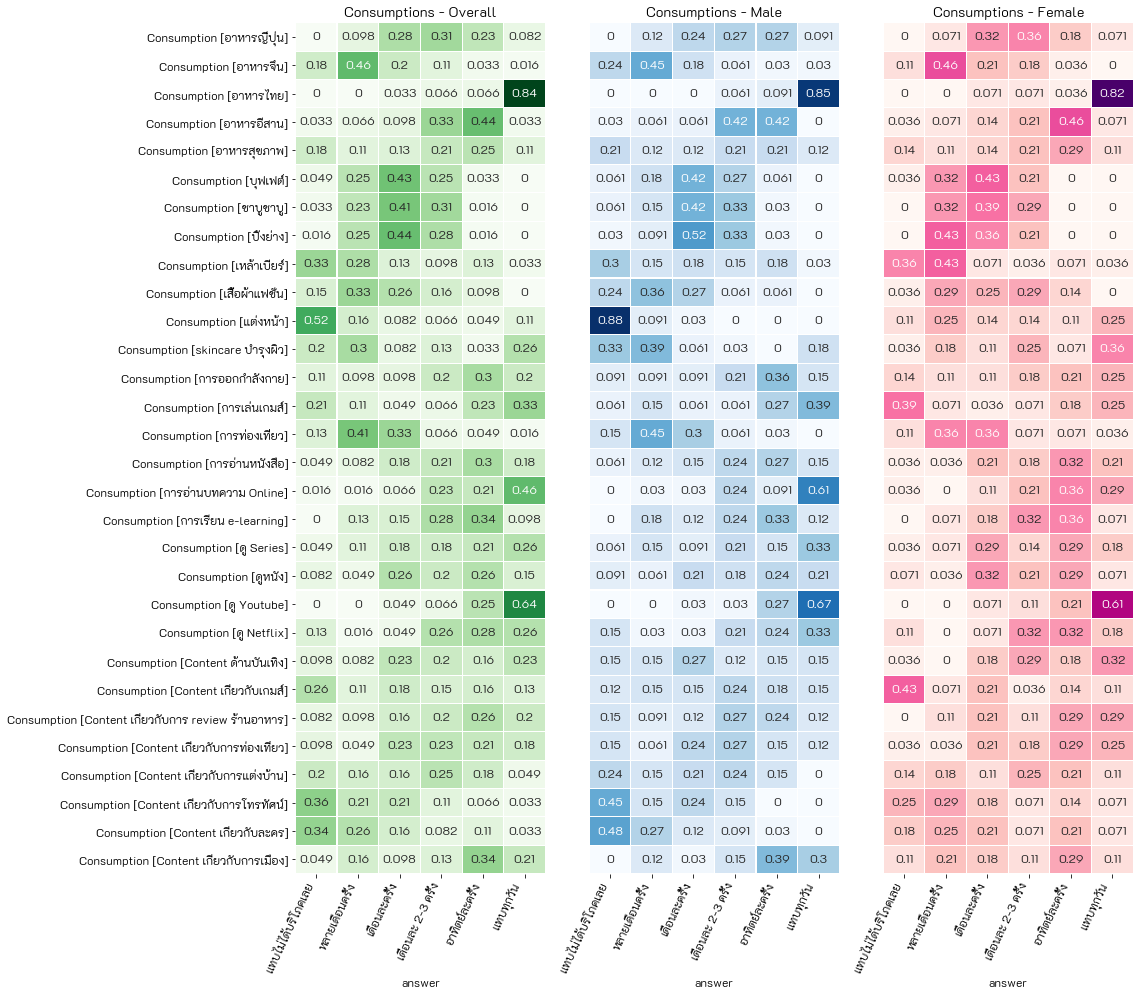

In [29]:
plt.subplots(1,3, figsize=(16,14), tight_layout=True)

plt.subplot(1,3,1)
plot_freq_heatmap(con_overall_df, 'Greens', 'Consumptions - Overall')

plt.subplot(1,3,2)
ax = plot_freq_heatmap(con_male_df, 'Blues', 'Consumptions - Male')
ax.set_yticks([])

plt.subplot(1,3,3)
ax = plot_freq_heatmap(con_female_df, 'RdPu', 'Consumptions - Female')
ax.set_yticks([])

plt.savefig('consumption_freq.png',dpi=100)
plt.show()


- การบริโภคสินค้าแต่งหน้า, สกินแคร์ ผู้ชายแทบไม่ซื้อเลย
- การเล่นเกม, content เกี่ยวกับเกม ผู้ชายบริโภคสูงกว่าผู้หญิงอย่างชัดเจน ผู้หญิงกลุ่มใหญ่บอกว่าไม่ได้เล่นเลย (แต่รองลงมาเป็นกลุ่มที่ได้เล่นบ่อยมาก)
- ได้ดู youtube บ่อยมากเป็นส่วนใหญ่

## Descriptive & Distributions

### Encode responses

In [30]:
intr_questions = list(df.columns[:30])
cons_questions = list(df.columns[30:60])

intr_mapper = { v:i for i,v in enumerate(intr_scale,1) }
cons_mapper = { v:i for i,v in enumerate(cons_scale,1) }
print(intr_mapper, cons_mapper, sep='\n')

{'ไม่สนใจอย่างมากที่สุด': 1, 'ไม่สนใจอย่างมาก': 2, 'ไม่สนใจ': 3, 'เฉยๆ': 4, 'สนใจ': 5, 'สนใจอย่างมาก': 6, 'สนใจอย่างมากที่สุด': 7}
{'แทบไม่ได้บริโภคเลย': 1, 'หลายเดือนครั้ง': 2, 'เดือนละครั้ง': 3, 'เดือนละ 2-3 ครั้ง': 4, 'อาทิตย์ละครั้ง': 5, 'แทบทุกวัน': 6}


In [31]:
score_df = df[list(df.columns[:60]) + ['gender','age_group']].copy()

for col in score_df.columns[:30]:
    score_df[col] = score_df[col].map(intr_mapper).astype(int)

for col in score_df.columns[30:60]:
    score_df[col] = score_df[col].map(cons_mapper).astype(int)

score_df = score_df.melt(id_vars=['gender','age_group'], var_name='question', value_name='score')
print(score_df.shape)
score_df.head()

(3660, 4)


,gender,age_group,question,score
0,M,32 - 35,Interest [อาหารญี่ปุ่น],5
1,F,28 - 31,Interest [อาหารญี่ปุ่น],6
2,M,28 - 31,Interest [อาหารญี่ปุ่น],7
3,M,Below 28,Interest [อาหารญี่ปุ่น],5
4,F,Below 28,Interest [อาหารญี่ปุ่น],6


In [32]:
intr_score_df = score_df[score_df['question'].isin(intr_questions)]
cons_score_df = score_df[score_df['question'].isin(cons_questions)]

### Descriptive

In [33]:
with pd.option_context('display.max_rows', None):
    display(score_df.groupby(['question','gender'])['score'].agg([len, np.mean, np.std, np.median, min, max]).reindex( 
        pd.MultiIndex.from_product([df.columns[:60],['F','M']], names=['Question', 'Gender']),
        fill_value=0
    ))

len  ...  max
Question                                           Gender       ...     
Interest [อาหารญี่ปุ่น]                            F        28  ...    7
                                                   M        33  ...    7
Interest [อาหารจึน]                                F        28  ...    7
                                                   M        33  ...    7
Interest [อาหารไทย]                                F        28  ...    7
                                                   M        33  ...    7
Interest [อาหารอีสาน]                              F        28  ...    7
                                                   M        33  ...    7
Interest [อาหารสุขภาพ]                             F        28  ...    7
                                                   M        33  ...    7
Interest [บุฟเฟต์]                                 F        28  ...    7
                                                   M        33  ...    7
Interest [ชาบูชาบู]                                F        28  ...    7
                                                   M        33  ...    7
Interest [ปิ้งย่าง]                                F        28  ...    7
                                                   M        33  ...    7
Interest [เหล้าเบียร์]                             F        28  ...    6
                                                   M        33  ...    7
Interest [เสื้อผ้าแฟชั่น]                          F        28  ...    7
                                                   M        33  ...    7
Interest [แต่งหน้า]                                F        28  ...    7
                                                   M        33  ...    5
Interest [skincare บำรุงผิว]                       F        28  ...    7
                                                   M        33  ...    7
Interest [การออกกำลังกาย]                          F        28  ...    7
                                                   M        33  ...    7
Interest [การเล่นเกมส์]                            F        28  ...    7
                                                   M        33  ...    7
Interest [การท่องเที่ยว]                           F        28  ...    7
                                                   M        33  ...    7
Interest [การอ่านหนังสือ]                          F        28  ...    7
                                                   M        33  ...    7
Interest [การอ่านบทความ Online]                    F        28  ...    7
                                                   M        33  ...    7
Interest [การเรียน e-learning]                     F        28  ...    7
                                                   M        33  ...    7
Interest [ดู Series]                               F        28  ...    7
                                                   M        33  ...    7
Interest [ดูหนัง]                                  F        28  ...    7
                                                   M        33  ...    7
Interest [ดู Youtube]                              F        28  ...    7
                                                   M        33  ...    7
Interest [ดู Netflix]                              F        28  ...    7
                                                   M        33  ...    7
Interest [Content ด้านบันเทิง]                     F        28  ...    7
                                                   M        33  ...    7
Interest [Content เกี่่ยวกับเกมส์]                 F        28  ...    7
                                                   M        33  ...    7
Interest [Content เกี่ยวกับการ review ร้านอาหาร]   F        28  ...    7
                                                   M        33  ...    7
Interest [Content เกี่ยวกับการท่องเที่ยว]          F        28  ...    7
                                                   M        33  ...    7
Interest [Content เกี่ยวกับการแต่งบ้าน]            F        28  ...    7
                                            

### Side-by-Side Distributions

Interest vs Consumption

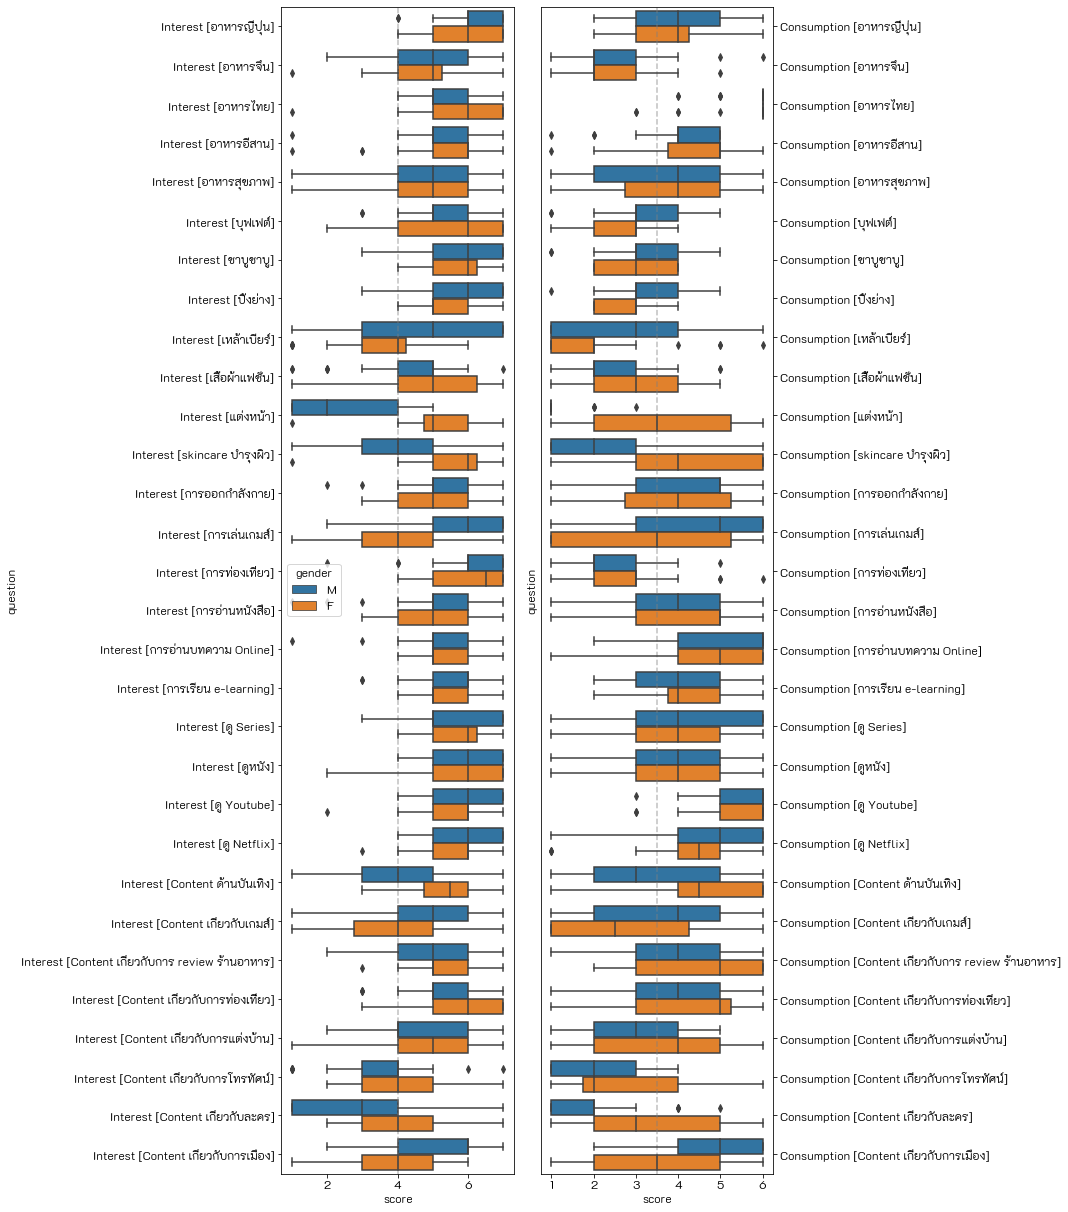

In [37]:
fig, axes = plt.subplots(1,2, figsize=(15,17), tight_layout=True)

ax = axes[0]
ax.axvline(x=4, color='gray',alpha=.5, linestyle='--')
ax = sns.boxplot(x='score',y='question', hue='gender',data=intr_score_df, ax=ax)#, palette=palette)

ax = axes[1]
ax.axvline(x=3.5, color='gray',alpha=.5, linestyle='--')
ax = sns.boxplot(x='score',y='question', hue='gender',data=cons_score_df, ax=ax)#, palette=palette)
ax.yaxis.tick_right()
ax.legend().set_visible(False)
plt.savefig('boxplot.png',dpi=100)
plt.show()

- ความสนใจในอาหารจีนพอมี แต่การได้บริโภคนั้นน้อย อาจจะเป็นเพราะไม่ค่อยมีร้านให้บริโภคมากเท่าอาหารไทย หรืออาหารญี่ปุ่น
- ความสนใจในบุฟเฟ่ต์ของผู้หญิงมี spread กว้างแต่เอาเข้าจริงการบริโภคก็ไม่ได้มากนัก
- การเล่นเกมถึงแม้ความสนใจของผู้หญิงจะอยู่กลาง ๆ แต่มีส่วนหนึ่งได้เล่นค่อนข้างบ่อย อาจจะเป็นเกมลักษณะ casual ที่เล่นฆ่าเวลาหรือไม่
- เนื่องจากเป็นนักศึกษาปริญญาโทสาขา BADS ความสนใจและการได้บริโภคของการอ่านหนังสือ บทความออนไลน์ e-Learning จึงค่อนไปทางบวก (as expected)

## Correlations

In [38]:
score_df = df[list(df.columns[:60]) + ['gender','age']].copy()

for col in score_df.columns[:30]:
    score_df[col] = score_df[col].map(intr_mapper).astype(int)

for col in score_df.columns[30:60]:
    score_df[col] = score_df[col].map(cons_mapper).astype(int)


In [39]:
intr_df = score_df[list(score_df.columns[:30]) + ['gender','age']]
cons_df = score_df[list(score_df.columns[30:60]) + ['gender','age']]

### Interest Correlation (Overall)

In [40]:
temp = intr_df.corr().reset_index().melt('index')
# remove self-corr
temp = temp[(temp['value']!=1)&(temp['value']!=-1)]
# remove duplicate pairs
temp = temp.groupby('value', as_index=False).first()
temp.columns = ['Correlation','Interest 1', 'Interest 2']

#### Top Positive Correlations (Overall)

In [41]:
temp[temp['Correlation']>=0.5].sort_values('Correlation', ascending=False)

,Correlation,Interest 1,Interest 2
464,0.804785,Interest [Content เกี่่ยวกับเกมส์],Interest [การเล่นเกมส์]
463,0.783882,Interest [การอ่านบทความ Online],Interest [การอ่านหนังสือ]
462,0.763070,Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการโทรทัศน์]
461,0.729146,Interest [Content เกี่ยวกับละคร],Interest [Content ด้านบันเทิง]
460,0.728552,Interest [skincare บำรุงผิว],Interest [แต่งหน้า]
459,0.705208,Interest [ชาบูชาบู],Interest [บุฟเฟต์]
458,0.703239,Interest [ดู Netflix],Interest [ดู Series]
457,0.692677,Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [การท่องเที่ยว]
456,0.660922,Interest [ดูหนัง],Interest [ดู Series]
455,0.635739,Interest [ปิ้งย่าง],Interest [ชาบูชาบู]


- สนใจปิ้งย่างจะสนใจบุฟเฟ่ต์ด้วย
- สนใจ content review ร้านอาหาร จะสนใจ อาหารญี่ปุ่น

#### Top Negative Correlations (Overall)

In [42]:
temp[temp['Correlation']<=-0.25].sort_values('Correlation')

,Correlation,Interest 1,Interest 2
0,-0.339076,Interest [การเล่นเกมส์],Interest [แต่งหน้า]
1,-0.330508,age,Interest [ชาบูชาบู]
2,-0.292973,age,Interest [บุฟเฟต์]
3,-0.283653,Interest [การเล่นเกมส์],Interest [อาหารอีสาน]


- ความสนใจการเล่นเกม สัมพันธ์เชิงลบ กับความสนใจแต่งหน้า -> คาแรคเตอร์ ชาย หญิง
- ความสนใจด้านชาบู กับ บุฟเฟ่ต์ เป็นที่นิยามในกลุ่มคนอายุน้อยมากกว่า

#### Correlation Matrix (Overall)

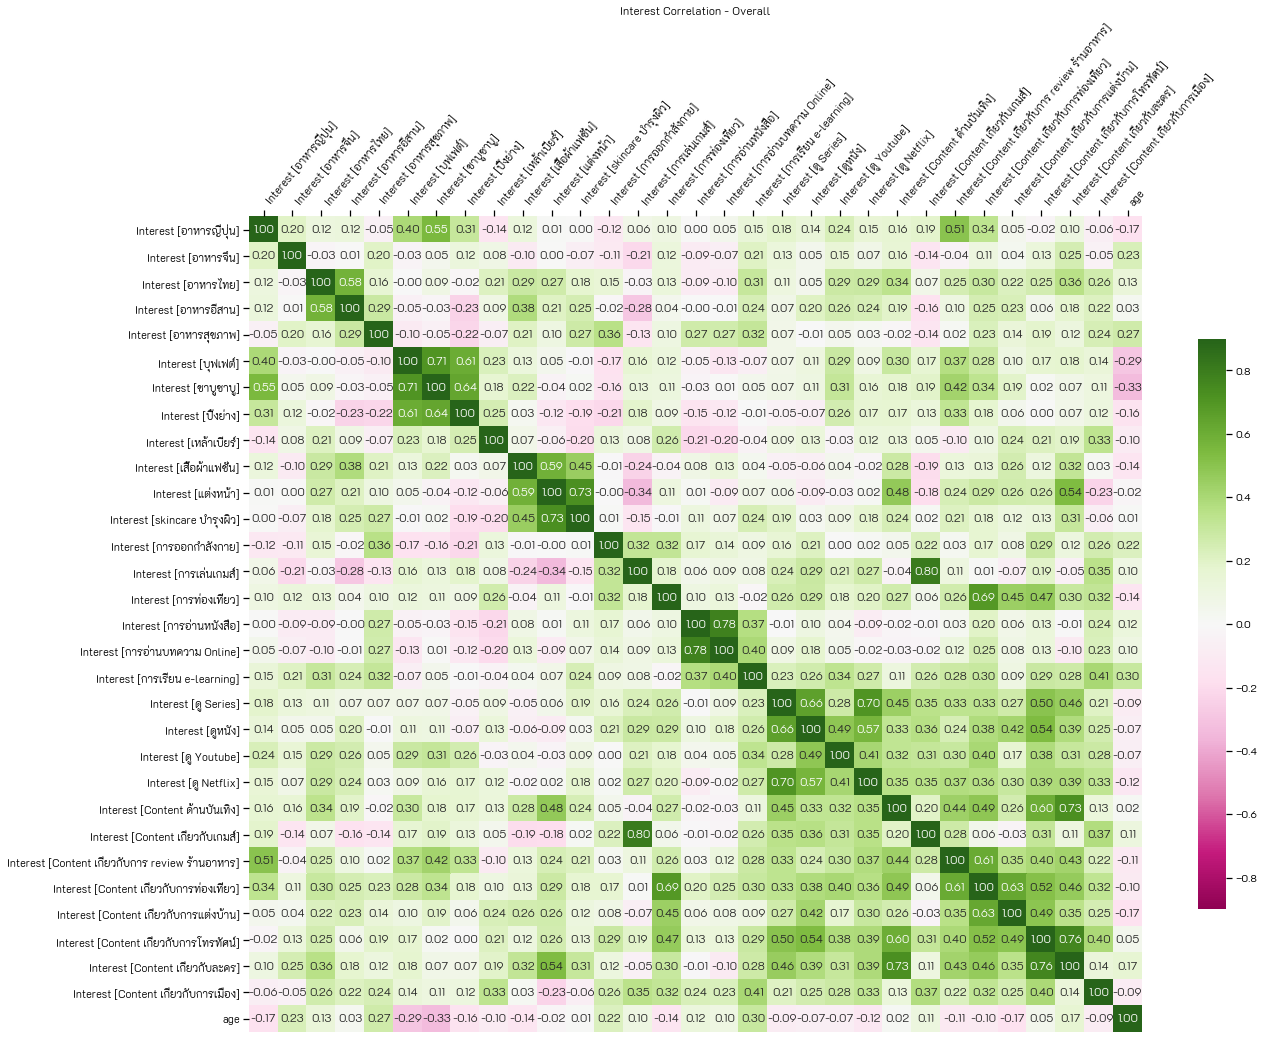

In [43]:
with sns.plotting_context("notebook", font_scale=.95):
    plt.figure(figsize=(20,15))
    ax = sns.heatmap(intr_df.corr(), cmap='PiYG', vmin=-.9, vmax=.9, annot=True, fmt='.2f', cbar_kws={"shrink":.70})
    ax.xaxis.set_ticks_position('top')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50, fontsize=11, ha='left')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)
    plt.title('Interest Correlation - Overall')
    plt.savefig('interest_corr_overall.png', dpi=100)
    plt.show()

### Interest Correlation (Female)

In [44]:
temp = intr_df[intr_df['gender']=='F'].corr().reset_index().melt('index')
# remove self-corr
temp = temp[(temp['value']!=1)&(temp['value']!=-1)]
# remove duplicate pairs
temp = temp.groupby('value', as_index=False).first()
temp.columns = ['Correlation','Interest 1', 'Interest 2']

#### Top Positive Correlations (Female)

In [45]:
temp[temp['Correlation']>=0.5].sort_values('Correlation', ascending=False)

,Correlation,Interest 1,Interest 2
464,0.895406,Interest [Content เกี่่ยวกับเกมส์],Interest [การเล่นเกมส์]
463,0.817319,Interest [skincare บำรุงผิว],Interest [แต่งหน้า]
462,0.811839,Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการโทรทัศน์]
461,0.800685,Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [การท่องเที่ยว]
460,0.785821,Interest [อาหารอีสาน],Interest [อาหารไทย]
459,0.769199,Interest [ปิ้งย่าง],Interest [ชาบูชาบู]
458,0.742581,Interest [การอ่านบทความ Online],Interest [การอ่านหนังสือ]
457,0.713462,Interest [แต่งหน้า],Interest [เสื้อผ้าแฟชั่น]
456,0.702514,Interest [ปิ้งย่าง],Interest [บุฟเฟต์]
455,0.696589,Interest [ชาบูชาบู],Interest [บุฟเฟต์]


**ผู้หญิง**
- (+) สนใจบำรุ่งผิว <-> สนใจแต่งหน้า
- (+) content - review ร้านอาหาร กับ อาหารญี่ปุ่น ชาบู <- content ที่ดูอาจจะเป็น content อาหารญี่ปุ่น  
not done -> TODO

#### Top Negative Correlations (Female)

In [46]:
temp[temp['Correlation']<=-0.30].sort_values('Correlation')

,Correlation,Interest 1,Interest 2
0,-0.480523,Interest [แต่งหน้า],Interest [อาหารจึน]
1,-0.417267,Interest [ปิ้งย่าง],Interest [อาหารอีสาน]
2,-0.397647,Interest [skincare บำรุงผิว],Interest [อาหารจึน]
3,-0.389916,Interest [เสื้อผ้าแฟชั่น],Interest [อาหารจึน]
4,-0.367380,Interest [การเล่นเกมส์],Interest [อาหารจึน]
5,-0.350402,Interest [Content เกี่่ยวกับเกมส์],Interest [อาหารจึน]
6,-0.348730,Interest [ชาบูชาบู],Interest [อาหารอีสาน]
7,-0.326814,Interest [ชาบูชาบู],Interest [อาหารสุขภาพ]
8,-0.324427,Interest [การออกกำลังกาย],Interest [บุฟเฟต์]
9,-0.319066,Interest [ปิ้งย่าง],Interest [อาหารสุขภาพ]


#### Corelation Matrix (Female)

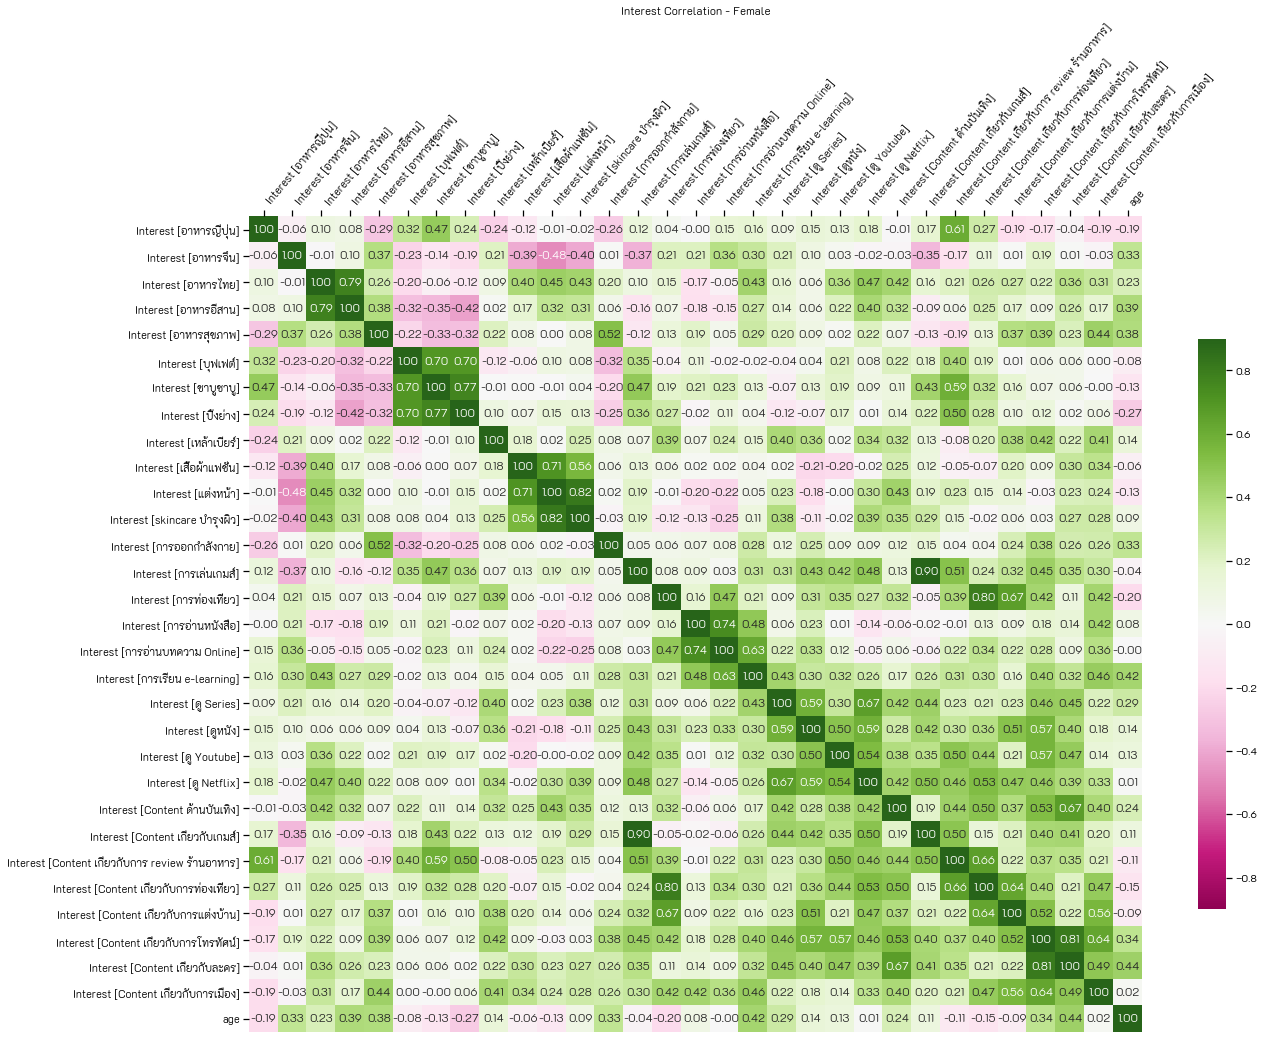

In [47]:
with sns.plotting_context("notebook", font_scale=.95):
    plt.figure(figsize=(20,15))
    ax = sns.heatmap(intr_df[intr_df['gender']=='F'].corr(), cmap='PiYG', vmin=-.9, vmax=.9, annot=True, fmt='.2f', cbar_kws={"shrink":.70})
    ax.xaxis.set_ticks_position('top')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50, fontsize=11, ha='left')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)
    plt.title('Interest Correlation - Female')
    plt.savefig('interest_corr_female.png', dpi=100)
    plt.show()

### Interest Correlation (Male)

In [51]:
temp = intr_df[intr_df['gender']=='M'].corr().reset_index().melt('index')
# remove self-corr
temp = temp[(temp['value']!=1)&(temp['value']!=-1)]
# remove duplicate pairs
temp = temp.groupby('value', as_index=False).first()
temp.columns = ['Correlation','Interest 1', 'Interest 2']

#### Top Positive Correlations (Male)

In [52]:
temp[temp['Correlation']>=0.5].sort_values('Correlation', ascending=False)

,Correlation,Interest 1,Interest 2
464,0.814342,Interest [การอ่านบทความ Online],Interest [การอ่านหนังสือ]
463,0.738639,Interest [ดู Netflix],Interest [ดู Series]
462,0.731118,Interest [ดูหนัง],Interest [ดู Series]
461,0.726161,Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการโทรทัศน์]
460,0.721234,Interest [ชาบูชาบู],Interest [บุฟเฟต์]
459,0.694436,Interest [Content เกี่ยวกับละคร],Interest [Content ด้านบันเทิง]
458,0.654769,Interest [Content เกี่่ยวกับเกมส์],Interest [การเล่นเกมส์]
457,0.625381,Interest [ชาบูชาบู],Interest [อาหารญี่ปุ่น]
456,0.622624,Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [การท่องเที่ยว]
455,0.606700,Interest [เสื้อผ้าแฟชั่น],Interest [อาหารอีสาน]


#### Top Negative Correlations (Male)

In [53]:
temp[temp['Correlation']<=-0.30].sort_values('Correlation')

,Correlation,Interest 1,Interest 2
0,-0.500836,age,Interest [บุฟเฟต์]
1,-0.497735,age,Interest [ชาบูชาบู]
2,-0.430955,Interest [การเล่นเกมส์],Interest [อาหารอีสาน]
3,-0.412912,Interest [การอ่านบทความ Online],Interest [เหล้าเบียร์]
4,-0.389324,Interest [การอ่านหนังสือ],Interest [เหล้าเบียร์]
5,-0.344456,age,Interest [ดู Series]
6,-0.334298,Interest [การอ่านหนังสือ],Interest [อาหารจึน]
7,-0.333721,Interest [การอ่านบทความ Online],Interest [อาหารจึน]
8,-0.320539,age,Interest [Content เกี่ยวกับการเมือง]


- ผู้ชาย อายุน้อยสนใจ บัฟเฟต์, ชาบูชาบู, ดูซีรีส์, content การเมือง กลับกันถ้าอายุเยอะ
- ผู้ชาย สนใจการเล่นเกม จะไม่สนใจอาหารอีสาน (55555 อะไรเนี่ย)
- ผู้ชาย สนใจเหล้าเบียร์ จะสวนทางกับ สนใจอ่านหนังสือ และอ่านบทความออนไลน์


#### Correlation Matrix (Male)

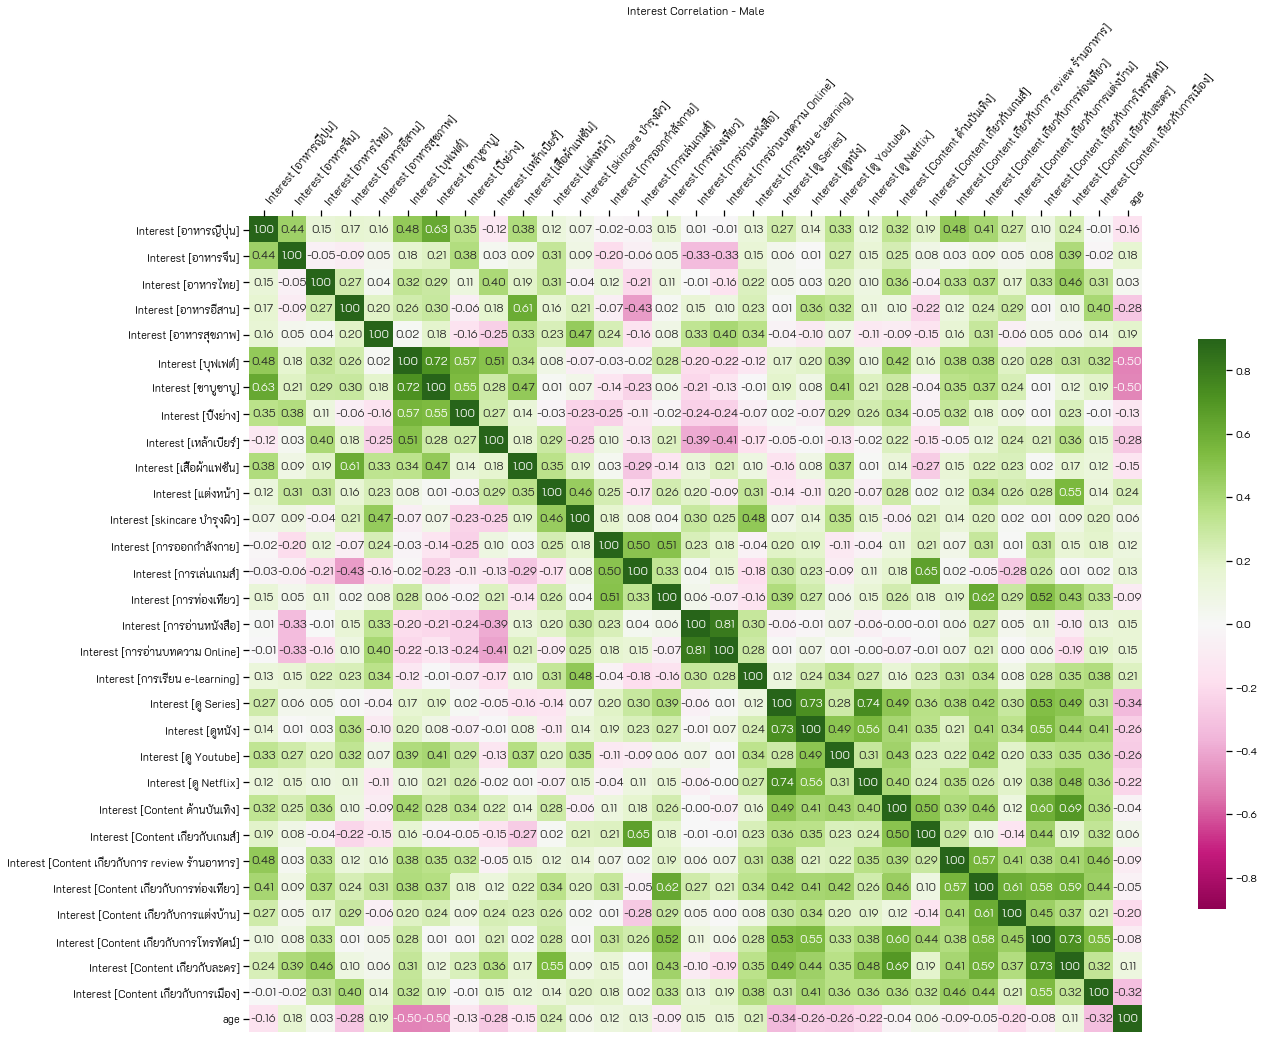

In [54]:
with sns.plotting_context("notebook", font_scale=.95):
    plt.figure(figsize=(20,15))
    ax = sns.heatmap(intr_df[intr_df['gender']=='M'].corr(), cmap='PiYG', vmin=-.9, vmax=.9, annot=True, fmt='.2f', cbar_kws={"shrink":.70})
    ax.xaxis.set_ticks_position('top')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50, fontsize=11, ha='left')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)
    plt.title('Interest Correlation - Male')
    plt.savefig('interest_corr_male.png', dpi=100)
    plt.show()

- ชาบู บุฟเฟ่ต์ ปิ้งย่าง ชาย อายุน้อย

### Consumption Correlation

In [55]:
temp = cons_df.corr().reset_index().melt('index')
# remove self-corr
temp = temp[(temp['value']!=1)&(temp['value']!=-1)]
# remove duplicate pairs
temp = temp.groupby('value', as_index=False).first()
temp.columns = ['Correlation','Consumption 1', 'Consumption 2']

#### Top Positive Consumption Correlation

In [56]:
temp[temp['Correlation']>=0.5].sort_values('Correlation', ascending=False)

,Correlation,Consumption 1,Consumption 2
464,0.816443,Consumption [Content เกี่ยวกับละคร],Consumption [Content เกี่ยวกับการโทรทัศน์]
463,0.741451,Consumption [Content เกี่่ยวกับเกมส์],Consumption [การเล่นเกมส์]
462,0.716483,Consumption [ดู Netflix],Consumption [ดู Series]
461,0.694803,Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [Content เกี่ยวกับการ review ร้านอ...
460,0.678250,Consumption [ชาบูชาบู],Consumption [บุฟเฟต์]
459,0.668489,Consumption [skincare บำรุงผิว],Consumption [แต่งหน้า]
458,0.600395,Consumption [Content เกี่ยวกับการแต่งบ้าน],Consumption [Content เกี่ยวกับการท่องเที่ยว]
457,0.571794,Consumption [Content เกี่ยวกับการท่องเที่ยว],Consumption [การท่องเที่ยว]
456,0.558778,Consumption [แต่งหน้า],Consumption [เสื้อผ้าแฟชั่น]
455,0.557495,Consumption [ชาบูชาบู],Consumption [อาหารญี่ปุ่น]


#### Top Negative Consumption Correlation

In [57]:
temp[temp['Correlation']<=-0.30].sort_values('Correlation')

,Correlation,Consumption 1,Consumption 2
0,-0.320925,Consumption [การอ่านหนังสือ],Consumption [บุฟเฟต์]


- บริโภคบุฟเฟต์เยอะ แต่อ่านหนังสือน้อย 5555 

#### Correlation Matrix

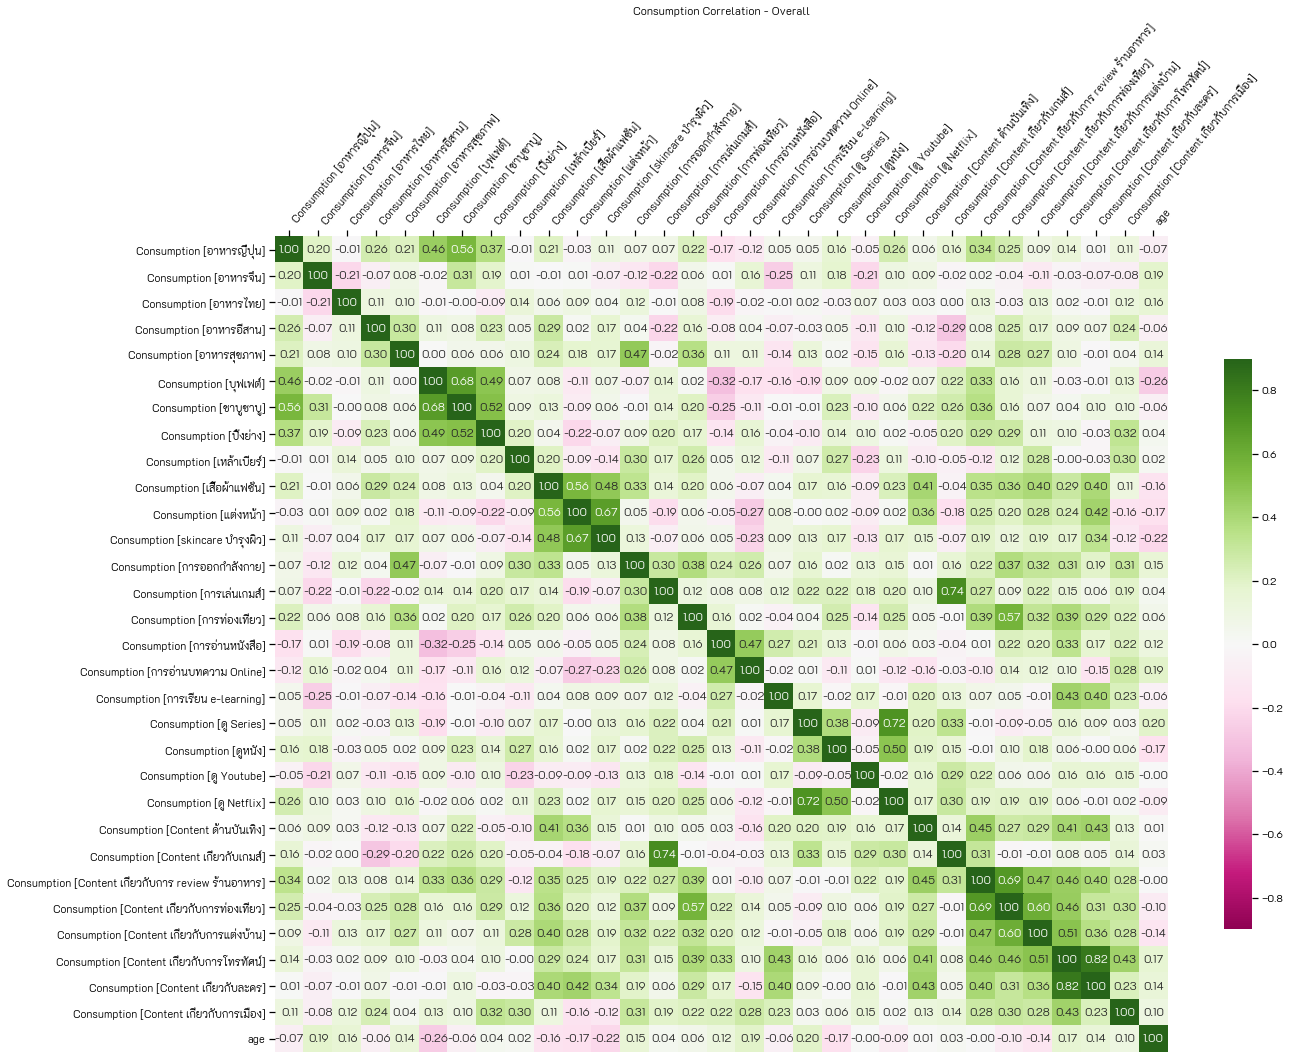

In [58]:
with sns.plotting_context("notebook", font_scale=.95):
    plt.figure(figsize=(20,15))
    ax = sns.heatmap(cons_df.corr(), cmap='PiYG', vmin=-.9, vmax=.9, annot=True, fmt='.2f', cbar_kws={"shrink":.70})
    ax.xaxis.set_ticks_position('top')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50, fontsize=11, ha='left')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)
    plt.title('Consumption Correlation - Overall')
    plt.savefig('consumption_corr_overall.png', dpi=100)
    plt.show()

**Future Work**
- Correlation of Interest vs Consumption
- Handle Rating Biases
- Factor Analysis